## 人工智能编程基础（试学班）

## 项目：我的微信好友

在这个notebook文件中，有些模板代码已经提供给你，但你还需要实现更多的功能来完成这个项目。除非有明确要求，你无须修改任何已给出的代码。以**'(练习)'**开始的标题表示接下来的代码部分中有你需要实现的功能。这些部分都配有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示。

除了实现代码外，你还**需要**回答一些与项目及代码相关的问题。每个需要回答的问题都会以 **'问题 X'** 标记。请仔细阅读每个问题，并且在问题后的 **'回答'** 部分写出完整的答案。我们将根据 你对问题的回答 和 撰写代码实现的功能 来对你提交的项目进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

---

### 让我们开始吧

在这个项目中，你将通过开源的微信个人号接口 [itchat](http://itchat.readthedocs.io/zh/latest/) 来实现 Python 调用微信好友数据，并做一些有趣的统计和分析，最终分享给你的好友 :P

### 项目内容

我们将这个notebook分为不同的步骤，你将完成以下5个任务：

**任务0 - 登陆微信，并通过向文件传输助手发送打招呼信息**

**任务1 - 统计你的微信好友的男女比例**

**任务2 - 分析微信好友的地域分布**

**任务3 - 生成微信好友的签名词云图**

**任务4 - 对签名进行情感分析**

---

## 任务0. 登陆并发送打招呼信息

### 登陆
在这一个章节中，我们已经为你导入`itchat`这个包，并调用`login()`函数登陆网页微信，试试看运行以下代码，并扫描二维码以登陆网页微信。

In [4]:
### 以下内容无需改动，直接运行即可
# 导入项目中所需要的包
import pandas as pd
import re
import os 
import numpy as np
import pinyin
import matplotlib.pyplot as plt
import itchat
%matplotlib inline

print("所有库导入成功！")

所有库导入成功！


In [2]:
# 调用login()函数以登录网页微信
itchat.login()

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 刘谕齐


---
**注意：如果您的账号为2018年新注册的账号，或者您倾向于使用假数据来完成此项目，可以将下方代码块中的变量`use_fake_dataset`设置为`True`。并且，您无需完成任务0中的练习和问题，可以直接从任务1开始。**

In [5]:
### 以下内容无需改动，直接运行即可
# 读取数据
use_fake_dataset = True
if not use_fake_dataset:
    dataset = itchat.get_friends(update=True)[0:]
else:
    dataset = pd.read_csv('wechat_friends.csv').fillna('').to_dict('records')


---

### 练习：打个招呼吧

在这个章节中，我们将调用`itchat`的`send()`函数向文件传输助手`filehelper`发送一个打招呼信息吧！

你需要完成以下内容：
 - 将想要发送的信息内容赋值给`message`

In [4]:
### TODO：将信息内容赋值给message
message = "你好"

In [5]:
### 以下内容无需改动，直接运行即可
# 发送消息
itchat.send(message, 'filehelper')

<ItchatReturnValue: {'BaseResponse': {'Ret': 0, 'ErrMsg': '请求成功', 'RawMsg': '请求成功'}, 'MsgID': '4600789884388031504', 'LocalID': '15321621605588'}>

打开手机微信端的文件传输助手，看看是否收到了这条信息，并回答以下问题。

### **问题1**
message 的变量类型是什么？

**回答**：（str）

In [6]:
### 退出登陆
itchat.logout()

LOG OUT!


<ItchatReturnValue: {'BaseResponse': {'ErrMsg': '请求成功', 'Ret': 0, 'RawMsg': 'logout successfully.'}}>

---

## 任务1. 好友男女比例

根据我们希望探索的问题，需要从数据集中取出以下几个部分：
- NickName：微信昵称
- Sex：性别，1表示男性，2表示女性
- Province：省份
- City：城市
- Signature：微信签名

In [6]:
### 以下内容无需改动，直接运行即可
def preprocess_data(dataset):
    
    data = [{'NickName': item['NickName'], 
            'Sex': item['Sex'], 
            'Province': item['Province'], 
            'City': item['City'], 
            'Signature': item['Signature']} 
            for item in dataset]
    
    return data

pre_data = preprocess_data(dataset)

### 练习：打印数据
* 打印`pre_data`的数据类型
* 打印`pre_data`中的第一条数据，以及其数据类型。
* 打印`pre_data`中第一条数据的微信昵称

In [9]:
### TODO：打印pre_data的数据类型
print(type(pre_data))

<class 'list'>


In [14]:
### TODO：打印第一条数据及数据类型
print(type(pre_data[0]))
print(pre_data[0])

<class 'dict'>
{'NickName': 'Myself', 'Sex': 2.0, 'Province': '江苏', 'City': '南京', 'Signature': 'Enjoy<span class="emoji emoji1f49d"></span>'}


In [13]:
### TODO：打印第一条数据的微信昵称
print(pre_data[0]['NickName'])

Myself


### **问题2**
pre_data的数据类型是什么？pre_data中第一条数据的数据类型呢？根据你的理解，这两种数据类型的区别是什么？

回答：list，dict。list是有序的，dict无序。

### 练习：统计男女比例
- 统计好友性别，分为男性、女性与未知三种，赋值到已经定义好的`sex`字典中。

提示：
- `pre_data`中1表示男性、2表示女性；
- *注意*：数据需要从第1条开始计算，因为**第0条是自己**。

In [18]:
# TODO：统计好友性别
sex = {
    'male': 0,
    'female': 0,
    'unknown': 0
}
for item in pre_data[1:]:
    if item['Sex'] == 1:
        sex['male'] +=1
    elif item['Sex'] == 2:
        sex['female'] +=1
    else:
        sex['unknown'] +=1

In [19]:
### 以下内容无需改动，直接运行即可
print("我的好友中共有", sex['male'],"位男性、", sex['female'], "位女性，有", sex['unknown'], "位好友未填写。")

我的好友中共有 77 位男性、 23 位女性，有 9 位好友未填写。


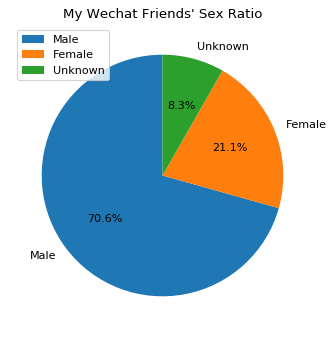

In [20]:
### 以下内容无需改动，直接运行即可
plt.figure(figsize=(8,5), dpi=80)
plt.axes(aspect=1) 
plt.pie([sex['male'], sex['female'], sex['unknown']],
        labels=['Male','Female','Unknown'],
        labeldistance = 1.1,
        autopct = '%3.1f%%',
        shadow = False,
        startangle = 90,
        pctdistance = 0.6 
)

plt.legend(loc='upper left',)
plt.title("My Wechat Friends' Sex Ratio")
plt.show()

这段代码的作用是绘制饼图，是不是很有趣？

**饼状图**是一种常见的单变量图形，用于描绘分类变量级别的相对频率。饼图中的频率用圆形的扇区表示：角度或面积越大，该分类值就越常见。

在「人工智能编程基础」这门课的第二章节中，将讲解如何使用`matplotlib`和`seaborn`绘制各种统计图表，进行数据可视化。

---

## 任务2. 好友地域分布
### 练习：统计好友省份
使用`list`中`append()`方法将好友省份添加至`province`中，注意**要去除空的字符串**

提示：可以用`for`循环实现

*注意*：数据需要从第1条开始计算，因为**第0条是自己**。

In [7]:
### TODO：将好友所在省份（不为空）添加到 province 中
province = []
for item in pre_data[1:]:
    if item['Province'] !="":
        province.append(item['Province'].strip())
    

In [8]:
### 以下内容无需修改，直接运行即可
province = [pinyin.get(i, format="strip", delimiter="") for i in province if i != '']

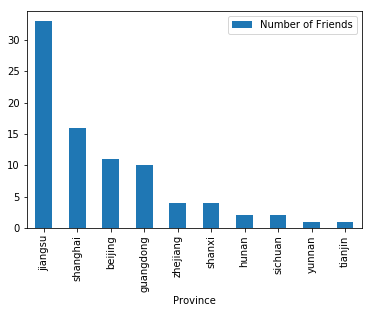

In [9]:
### 以下内容无需修改，直接运行即可
province = pd.DataFrame(province)
province.columns = ['Province']
province['Number of Friends'] = 1
province.groupby('Province').sum().sort_values('Number of Friends', ascending=False)[:10].plot.bar()

**条形图**用于描述分类变量的分布情况。在条形图中，分类变量的每个级别用长条表示，高度表示数据在该级别的出现频率。

---

## 任务3. 生成好友个性签名词云图

在这里我们希望生成词云，只需要调用第三方库即可，Python有大量的库可以使用，能极大提高开发效率，是编程入门的绝佳选择。

### 练习：打印个性签名
* 使用`print()`语句打印出最长的3个个性签名

In [46]:
### TODO：打印最长的3个个性签名
length = [len(item['Signature'].strip()) for item in pre_data ]
for i in range(3):
    no = length.index(max(length[1:]))
    print(pre_data[no]['Signature'])
    length[no] = -1

除了努力之外就还是努力<span class="emoji emoji1f4aa"></span>
I am tired of reading stories about great men.
I will love you with every beat of my heart.


In [49]:
### 以下内容无需修改，直接运行即可
from wordcloud import WordCloud
import jieba

tList = []
for i in pre_data:
    signature = i["Signature"].replace(" ", "").replace("span", "").replace("class", "").replace("emoji", "")
    rep = re.compile("1f\d.+")
    signature = rep.sub("", signature)
    if len(signature) > 0:
        tList.append(signature)
    
text = "".join(tList)

wordlist_jieba = jieba.cut(text, cut_all=True)
wl_space_split = " ".join(wordlist_jieba)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/8d/z6lb9t1s4rx1jscmh02p31n91qwtdd/T/jieba.cache
Loading model cost 0.986 seconds.
Prefix dict has been built succesfully.


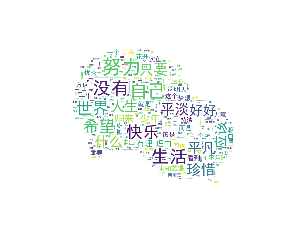

In [50]:
### 以下内容无需修改，直接运行即可
import PIL.Image as Image

alice_coloring = np.array(Image.open("wechat.jpg"))

my_wordcloud = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
                         max_font_size=40, random_state=42, font_path='./SimHei.ttf').generate(wl_space_split)


plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

my_wordcloud.to_file(os.path.join("wechatfriends_wordcloud.png"))

---

## 任务4. 对好友签名进行情感分析

在这部分内容中，我们调用了[SnowNLP](https://github.com/isnowfy/snownlp)的情感分析，它是一个python写的类库，可以方便的处理中文文本内容，不用我们实现其中具体的代码。一般来说，情感分析的目的是为了找出作者观点的态度，是正向还是负向，或者更具体的，我们希望知道他的情绪。

在这里，我们希望了解到好友签名所表达出来的情感是积极的，还是中立、负面的，比如说在以下例子中，我们对"这个商品我非常喜欢，颜色很合我意！"这句话进行了预处理，并通过训练好的模型预测其的情感。

在这里，我们简单地假设大于0.66表示积极，低于0.33表示消极，其他表示中立。

运行以下代码试试看！

In [51]:
### 以下内容无需修改，直接运行即可
from snownlp import SnowNLP

text = "这个商品我非常喜欢，颜色很合我意！"
sentiment = SnowNLP(text).sentiments

print(sentiment)

0.6851400314498396


接下来，我们将好友的签名进行文本预处理，并尝试统计其中积极、中立、消极的个数。

### 练习：统计好友签名情感分析结果比例
* 统计sentiments中**大于0.66**的个数
* 统计sentiments中**大于等于0.33且小于等于0.66**的个数
* 统计sentiments中**小于0.33**的个数

提示：可以用循环语句或者列表表达式实现。

In [52]:
### 以下内容无需修改，直接运行即可
sentiments = []
for i in tList:
    sentiments.append(SnowNLP(i).sentiments) 

In [55]:
### TODO：统计sentiments中大于0.66的个数
positive = 0
### TODO：统计sentiments中大于等于0.33且小于等于0.66的个数
neutral = 0
### TODO：统计sentiments中小于0.33的个数
negative = 0

for sentiment in sentiments:
    if sentiment > 0.66:
        positive += 1
    elif sentiment >= 0.33 and sentiment <= 0.66:
        neutral +=1
    else:
        negative +=1

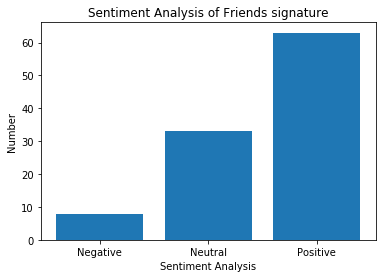

In [56]:
### 以下内容无需修改，直接运行即可
labels = [u'Negative',u'Neutral',u'Positive']
values = (negative,neutral,positive)
plt.xlabel(u'Sentiment Analysis')
plt.ylabel(u'Number')
plt.xticks(range(3),labels)
plt.bar(range(3), values)

plt.title('Sentiment Analysis of Friends signature')
plt.show()

**注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出File -> Download as -> HTML (.html)把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。**